<a href="https://colab.research.google.com/github/mariagichomo/Fraud-detection/blob/main/Fraud_detection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
client_df = pd.read_csv("drive/MyDrive/Data/train/client_train.csv")


In [47]:
client_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [48]:
invoice_df = pd.read_csv("drive/MyDrive/Data/train/invoice_train.csv",low_memory=False)

In [49]:
invoice_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [50]:
client_df.isnull().values.any()

False

In [51]:
invoice_df.isnull().values.any()

False

In [52]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [53]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [54]:
client_df.duplicated().values.any()

False

In [55]:
invoice_df.duplicated().values.any()

True

In [56]:
invoice_df.shape

(4476749, 16)

In [ ]:
invoice_duplicates = invoice_df[invoice_df.duplicated(keep=False)]
print(invoice_duplicates)

In [58]:
invoice_df=invoice_df.drop_duplicates()

In [59]:
invoice_df.duplicated().any()

False

In [60]:
client_df.shape

(135493, 6)

In [61]:
invoice_df.shape

(4476738, 16)

In [62]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [92]:
client_df['creation_date'] = pd.to_datetime(client_df['creation_date'])

In [93]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  int64         
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  int64         
 3   region         135493 non-null  int64         
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.2+ MB


In [94]:
client_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0
1,69,train_Client_1,11,107,2002-05-29,0.0
2,62,train_Client_10,11,301,1986-03-13,0.0
3,69,train_Client_100,11,105,1996-11-07,0.0
4,62,train_Client_1000,11,303,2014-10-14,0.0


In [66]:
client_df['region'].duplicated().any()


True

In [67]:
client_df.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


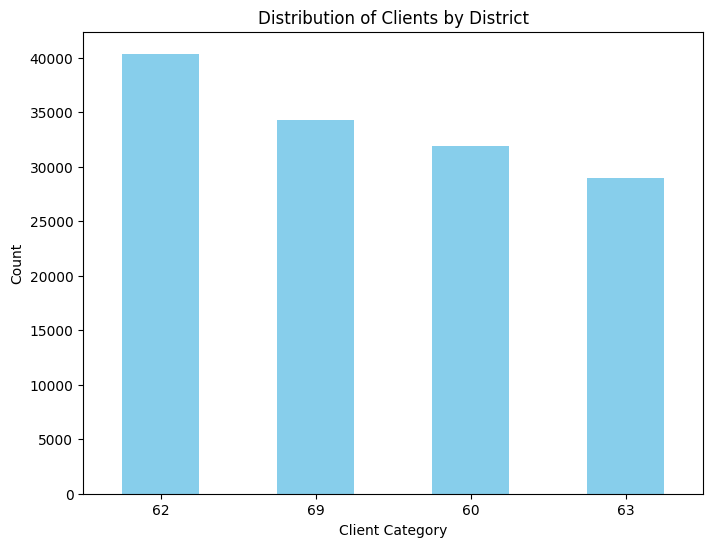

In [105]:
client_catg_counts = client_df['disrict'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
client_catg_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Client Category')
plt.ylabel('Count')
plt.title('Distribution of Clients by District')
plt.xticks(rotation=0)
plt.show()


In [68]:
invoice_df.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06
mean,2.012804e+01,1.230590e+11,1.724882e+02,7.321705e+00,1.003040e+00,4.109805e+02,1.093227e+02,2.030625e+01,5.292601e+01,1.776701e+04,1.834972e+04,4.483105e+01
std,1.347256e+01,1.657269e+12,1.338869e+02,1.571655e+00,3.083470e-01,7.573087e+02,1.220125e+03,1.574241e+02,8.754735e+02,4.036695e+04,4.095323e+04,3.128339e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [69]:
count = client_df['target'].value_counts()
print(count)

0.0    127927
1.0      7566
Name: target, dtype: int64


Text(0.5, 1.0, 'Count of Fraud and Non-Fraud in Target Column')

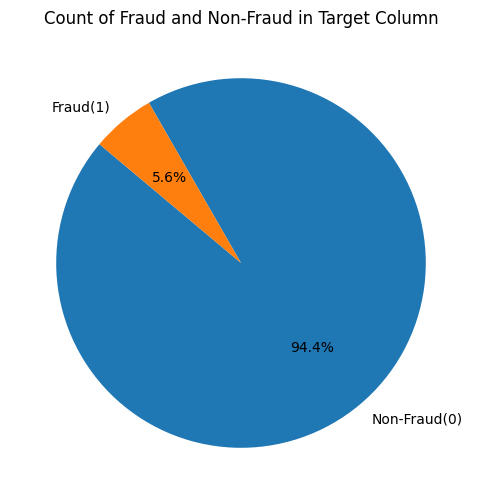

In [70]:
# Create a pie chart


plt.figure(figsize=(6,6))
plt.pie(count, labels=['Non-Fraud(0)', 'Fraud(1)'],autopct='%1.1f%%', startangle=140)

plt.title('Count of Fraud and Non-Fraud in Target Column')


In [71]:
client_df['client_id'].isin(invoice_df['client_id']).values.any()

True

In [72]:
merged_df = pd.merge(client_df,invoice_df, on='client_id',how = 'inner')
merged_df.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31-12-94,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31-12-94,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31-12-94,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31-12-94,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31-12-94,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [73]:
merged_df.shape

(4476738, 21)

In [74]:
#find duplicates
merged_df.duplicated().values.any()

False